In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

plt.rc('axes', titlesize=16)

df = pd.read_csv('fedberry-barebone-offline.csv')
df['network'] = 'Offline'
df2 = pd.read_csv('fedberry-barebone-cable.csv')
df2['network'] = 'Cabo'
df3 = pd.read_csv('fedberry-barebone-wifi.csv')
df3['network'] = 'Wifi'

df['os'] = 'Fedberry'
df2['os'] = 'Fedberry'
df3['os'] = 'Fedberry'

df4 = pd.read_csv('jessie-lite-boot-offline.csv')
df4['network'] = 'Offline'
df5 = pd.read_csv('jessie-lite-boot-cable.csv')
df5['network'] = 'Cabo'
df6 = pd.read_csv('jessie-lite-boot-wifi.csv')
df6['network'] = 'Wifi'

df4['os'] = 'Raspbian Lite'
df5['os'] = 'Raspbian Lite'
df6['os'] = 'Raspbian Lite'

df7 = pd.read_csv('arch-boot-offline.csv')
df7['network'] = 'Offline'
df8 = pd.read_csv('arch-boot-cable.csv')
df8['network'] = 'Cabo'
df9 = pd.read_csv('arch-boot-wifi.csv')
df9.power += 1.5
df9['network'] = 'Wifi'

df7['os'] = 'ArchLinux ARM'
df8['os'] = 'ArchLinux ARM'
df9['os'] = 'ArchLinux ARM'

df10 = pd.read_csv('jessie-boot-offline.csv')
df10['network'] = 'Offline'
df11 = pd.read_csv('jessie-boot-cable.csv')
df11['network'] = 'Cabo'
df12 = pd.read_csv('jessie-boot-wifi.csv')
df12['network'] = 'Wifi'

df10['os'] = 'Raspbian Jessie'
df11['os'] = 'Raspbian Jessie'
df12['os'] = 'Raspbian Jessie'


def energy (time, power):
    return power * (time / 1000 / 3600);

for d in [df, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]:
    time = d.time.max()
    d['energy'] = d.apply(lambda row: energy(time, row.power), axis=1)


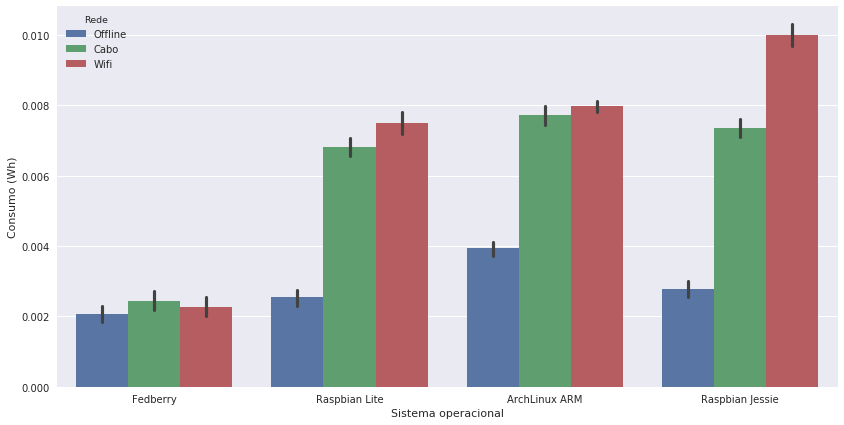

In [56]:
master = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

plt.figure(figsize=(14, 7))
plot = sns.barplot (x='os', y='energy', hue='network', data=master)
plot.set_ylabel('Consumo (Wh)')

plot.set_xlabel('Sistema operacional')
plot.legend_.set_title('Rede')